In [4]:
import pandas as pd
import re

#Import main dataset "match_birthday"
df = pd.read_csv('resources/match_birthday.csv')

#Create a column for years
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year

#Create and filter a winner df
winner_df= df[['tourney_name', 'surface', 'winner_name','year']]
winner_df.rename(columns={'winner_name': 'player'}, inplace=True)
winner_df['wins'] = 1

#Create and filter a loser df
loser_df= df[['tourney_name', 'surface', 'loser_name','year']]
loser_df.rename(columns={'loser_name': 'player'}, inplace=True)
loser_df['wins'] = 0
  
new_df = pd.concat([winner_df, loser_df], ignore_index=True)


total_win_ratio = new_df.groupby('player')['wins'].mean() * 100
surface_win_ratio = new_df.groupby(['player', 'surface', 'year'])['wins'].mean() * 100


result_df = pd.merge(surface_win_ratio, total_win_ratio, how='outer', left_index=True, right_index=True, suffixes=('_surface', '_total'),  indicator=True)
result_df = result_df.reset_index()
result_df

,player,surface,year,wins_surface,wins_total,_merge
0,Abd Hazli Bin Zainuddin,Hard,2010,0.000000,0.0,both
1,Abdulhameed Alshatti,Hard,2014,0.000000,0.0,both
2,Abdulhamid Mubarak,Clay,2016,0.000000,0.0,both
3,Abdulla Hajji,Hard,2010,0.000000,0.0,both
4,Abdullah Maqdas,Clay,2015,50.000000,50.0,both
...,...,...,...,...,...,...
8111,Zizou Bergs,Hard,2020,0.000000,0.0,both
8112,Zsombor Piros,Clay,2018,33.333333,40.0,both
8113,Zsombor Piros,Hard,2018,100.000000,40.0,both
8114,Zsombor Piros,Hard,2019,0.000000,40.0,both


In [120]:
import plotly.express as px

def scatter_interactivity(df):
    
    #Again, plot using px.scatter
    fig = px.scatter(df, 
                     x='year', 
                     y="wins_surface", 
                     hover_name="player", 
                     size="wins_surface",
                     color="surface",
                     color_discrete_sequence=px.colors.qualitative.Antique,
                     trendline="ols", #We will use ordinary least squares regression without setting the trendline to "overall" since we are cycling through the years
                     animation_frame="player", #setting the animation frame will create a slider for interactivty and set it to year to cycle through them
                     #animation_group="year" #setting animation group so we can view each players performance over time
                    )
    
    #Update titles and formatting
    fig.update_layout(title={'text': "Top ATP Players Total Win Rate vs Win Rate by Surface (2010-2020)",
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'y':0.9,
                            'x':0.5},
                      xaxis_title="Year",
                      yaxis_title="Total Win Rate %",
                      plot_bgcolor='#d7e6a3',
                      paper_bgcolor='#d7e6a3',
                     )
    

    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        #showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    return fig

#scatter_interactivity(result_df)

In [121]:
top_players = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']

top_players_df = result_df[result_df['player'].isin(top_players)]

top_players_df

,player,surface,year,wins_surface,wins_total,_merge
659,Andy Murray,Clay,2010,60.000000,79.725086,both
660,Andy Murray,Clay,2011,75.000000,79.725086,both
661,Andy Murray,Clay,2012,69.230769,79.725086,both
662,Andy Murray,Clay,2013,71.428571,79.725086,both
663,Andy Murray,Clay,2014,73.333333,79.725086,both
...,...,...,...,...,...,...
6683,Roger Federer,Hard,2016,80.000000,85.141159,both
6684,Roger Federer,Hard,2017,93.478261,85.141159,both
6685,Roger Federer,Hard,2018,84.782609,85.141159,both
6686,Roger Federer,Hard,2019,83.333333,85.141159,both


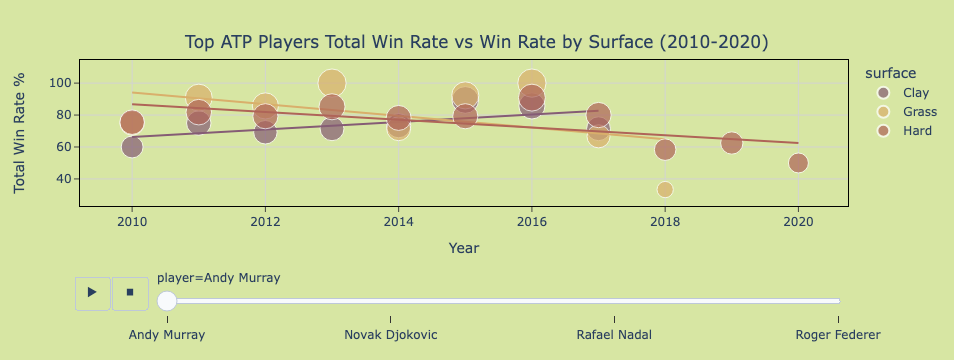

In [122]:
scatter_interactivity(top_players_df)

In [123]:
most_tourneys = result_df['wins_total'].nlargest(4).index
most_tourneys_df = result_df[result_df['wins_total'].isin(most_tourneys)]

most_tourneys_df



,player,surface,year,wins_surface,wins_total,_merge


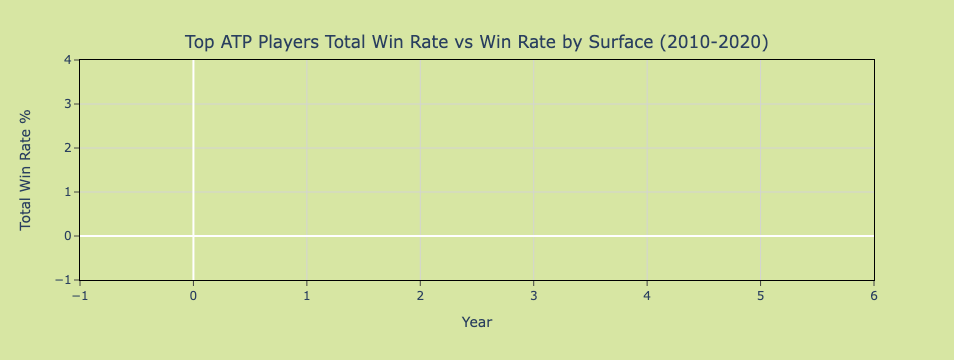

In [124]:
scatter_interactivity(most_tourneys_df)

In [125]:
def top_players(df):


    # Specify the number of top players you want to select
    top_n = 4

    # Find the top N most frequent players
    top_players = df['player'].value_counts().head(top_n).index

    # Filter the DataFrame to include only rows with these top cities
    filtered_df = df[df['player'].isin(top_players)]

    # Sort the filtered DataFrame by 'WinRate' from highest to lowest
    sorted_filtered_df = filtered_df.sort_values(by='wins_total', ascending=False)

    # Create a new DataFrame with the sorted filtered rows
    new_df = pd.DataFrame(sorted_filtered_df)

    # Display the new DataFrame
    return new_df

top_players_df = top_players(result_df)
top_4_players = top_players_df['player'].unique()

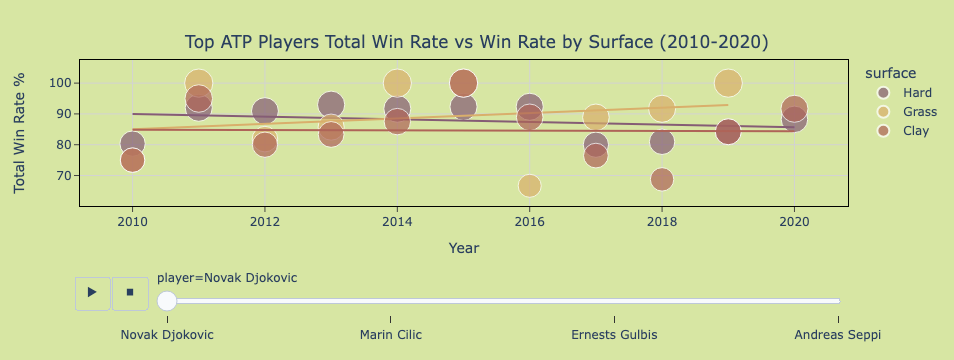

In [126]:
scatter_interactivity(top_players_df)

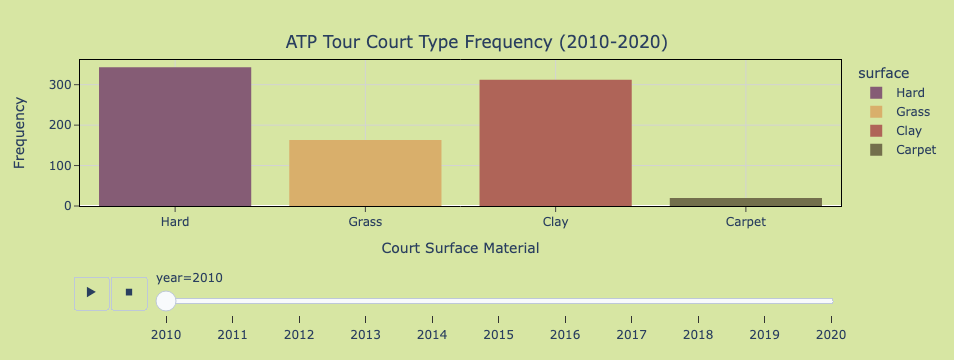

In [131]:
def histogram(df):
    
    df = df.sort_values(by='year')
    
    #Again, plot using px.scatter
    fig = px.histogram(df, 
                     x='surface', 
                     #y="wins_surface", 
                     #hover_name="player", 
                     #size="wins_surface",
                     color="surface",
                     color_discrete_sequence=px.colors.qualitative.Antique,
                     #trendline="ols", #We will use ordinary least squares regression without setting the trendline to "overall" since we are cycling through the years
                     animation_frame="year", #setting the animation frame will create a slider for interactivty and set it to year to cycle through them
                     #animation_group="year" #setting animation group so we can view each players performance over time
                    )
    
    #Update titles and formatting
    fig.update_layout(title={'text': "ATP Tour Court Type Frequency (2010-2020)",
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'y':0.9,
                            'x':0.5},
                      xaxis_title="Court Surface Material",
                      yaxis_title="Frequency",
                      plot_bgcolor='#d7e6a3',
                      paper_bgcolor='#d7e6a3',
                     )
    

    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        #showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    return fig



histogram(result_df)

In [ ]:
fig = px.violin(df, y='Value', x='Category', box=True, points='all', title='Violin Plot Example')

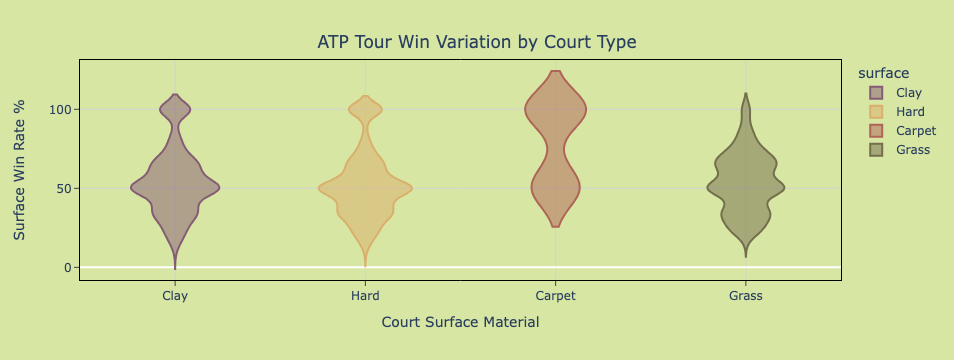

In [135]:
def violin(df):
    
    df = df[df['wins_surface'] != 0]
    
    #Again, plot using px.scatter
    fig = px.violin(df, 
                     x='surface', 
                     y="wins_surface",
                     #hover_name="player", 
                     #size="wins_surface",
                     color="surface",
                     color_discrete_sequence=px.colors.qualitative.Antique,
                     #trendline="ols", #We will use ordinary least squares regression without setting the trendline to "overall" since we are cycling through the years
                     #animation_frame="year", #setting the animation frame will create a slider for interactivty and set it to year to cycle through them
                     #animation_group="year" #setting animation group so we can view each players performance over time
                    )
    
    #Update titles and formatting
    fig.update_layout(title={'text': "ATP Tour Win Variation by Court Type",
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'y':0.9,
                            'x':0.5},
                      xaxis_title="Court Surface Material",
                      yaxis_title="Surface Win Rate %",
                      plot_bgcolor='#d7e6a3',
                      paper_bgcolor='#d7e6a3',
                     )
    

    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        #showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    return fig



violin(result_df)